<a href="https://colab.research.google.com/github/clairembassett/DS-1002/blob/main/Pandas/Data_deep_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas Data Cleaning

```
  University of Virginia
  DS1002: Programming for Data Science
```

## PREREQUISITES
- data types
- pandas dataframes

## OBJECTIVES
- Deal with issues with numerical, text, and categorical data

In [14]:
import pandas as pd
import numpy as np

## Working with duplicate data

Pandas can identify duplicate rows and duplicate columns within a DataFrame.

Find the file `dupe-vals.csv` in the `data/` folder on GitHub.

In [39]:
dupes = pd.read_csv('./dupe-vals.csv')

In [40]:
dupes.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
116     True
117     True
118     True
119     True
120     True
Length: 121, dtype: bool

In [41]:
# let's get a total of how many rows are duplicate
print(dupes.duplicated().sum())

21


In [42]:
# remove the duplicate rows - but be sure to keep one copy!
dupes = dupes.drop_duplicates()

# Working with Missing Data

Pandas primarily uses the data type `np.nan` from NumPy to represent missing data.


In [18]:
df_miss = pd.DataFrame({
    'x':[2, np.nan, 1],
    'y':[np.nan, np.nan, 6],
    'z':[4, np.nan, np.nan]}
)

In [19]:
df_miss

,x,y,z
0,2.0,NaN,4.0
1,NaN,NaN,NaN
2,1.0,6.0,NaN


## `.dropna()`

This will drop all rows with missing data in any column.

[Details](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

In [20]:
df_drop_all = df_miss.dropna()
df_drop_all

,x,y,z


The `subset` parameter takes a list of column names to specify which columns should have missing values.

In [21]:
df_drop_x = df_miss.dropna(subset=['x'])
df_drop_x

,x,y,z
0,2.0,NaN,4.0
2,1.0,6.0,NaN


## `.fillna()`

This will replace missing values with whatever you set it to, e.g. $0$s.

[Details](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

We can pass the results of an operation -- for example to peform simple imputation, we can replace missing values in each column with the median value of the respective column:

In [22]:
df_filled = df_miss.fillna(df_miss.median())

In [23]:
df_filled

,x,y,z
0,2.0,6.0,4.0
1,1.5,6.0,4.0
2,1.0,6.0,4.0


# Try It Yourself

Fetch the `very-messy-data.csv` file from the `data/` folder on GitHub, and drag it into the files of this notebook.

Using the methods you learned above, practice your skills by doing the following:

1. Remove duplicate lines
2. Where you are missing species data, remove those lines.
3. Where you are missing other data, impute data based on the mean of the rest of that column. Repeat for any columns with missing data.

## Data Type Constraints

We need to make sure our variables have the correct data types, other wise we risk compromising our analysis.

Example:


In [24]:
# import `sales.csv`
sales = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/sales.csv')
sales.head(2)

,SalesOrderID,Revenue,Quantity
0,43659,23153$,12
1,43660,1457$,2


We want to calculate total revenue.

In [25]:
sales['Revenue'].sum()

'23153$1457$3857$15748$18067$5978$2985$28567$9865$2314$3459$8736$16732$21562$'

This produces some sort of numerical/repeating error we need to solve. Let's examine the data types of the columns.

In [26]:
sales.dtypes

SalesOrderID     int64
Revenue         object
Quantity         int64
dtype: object

And next let's look at some rows to see what we find.

In [27]:
sales.head(20)

,SalesOrderID,Revenue,Quantity
0,43659,23153$,12
1,43660,1457$,2
2,43661,3857$,3
3,43662,15748$,8
4,43663,18067$,10
5,43664,5978$,4
6,43665,2985$,3
7,43666,28567$,15
8,43667,9865$,6
9,43668,2314$,3


In [28]:
# remove $ from Revenue columns
sales['Revenue'] = sales['Revenue'].str.strip('$')
sales['Revenue'] = sales['Revenue'].astype('int')

In [31]:
sales.head(5)

,SalesOrderID,Revenue,Quantity
0,43659,23153,12
1,43660,1457,2
2,43661,3857,3
3,43662,15748,8
4,43663,18067,10


In [30]:
sales.dtypes

SalesOrderID    int64
Revenue         int64
Quantity        int64
dtype: object

In [29]:
# verify that Revenue is now an integer
sales['Revenue'].dtype == 'int'

True

## Numeric or categorical data

Example:

In [ ]:
# import `marriage_status.csv`
marriage_status = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/marriage_status.csv')
marriage_status.head(3)

`0` = Never Married
`1` = Married
`2` = Separated
`3` = Divorced

In [ ]:
marriage_status.head(50)

In [ ]:
marriage_status['marriage_status'].describe()

<!-- Calculated as a numeric variables when in reality a categorical.  

Let's change the the data type to `categorical`
-->

In [ ]:
marriage_status['marriage_status'] = marriage_status['marriage_status'].astype('category')

In [ ]:
marriage_status.describe()

In [ ]:
marriage_status.dtypes

Pandas now gives summary outputs consistent with a `categorical` variable.

Now let's udpate the values in that column for consistency.

In [ ]:
marriage_status["marriage_status"] = marriage_status["marriage_status"].str.lower()

In [ ]:
marriage_status.describe()

This got us from 6 to the 4 unique values we want (unmarried, married, separated, divorced)

## Out of Range Data

Out of range data can occur from human error, data collection error, etc.   

Let's work through a couple examples

**`Movie Ratings`**  

consists of `name`, `year`, and `score` (0-10)  

**`User Signups`**  

consists of `subscription_date`, `user_name`, `country`  

In [ ]:
# import movie_ratings.csv
movies = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/movies.csv')
movies.head(2)

In [ ]:
# data viz
import matplotlib.pyplot as plt
plt.hist(movies['Score'])
plt.title('Average rating of top 50 movies (0-10')

In [ ]:
# import `user_signups`
users = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/user_signups.csv')
users.tail()

In [ ]:
users.dtypes

In [ ]:
#import datetime
import datetime as dt

#convert object to date
users['subscription_date'] = pd.to_datetime(users['subscription_date'])
users.dtypes


In [ ]:
users.head()

In [ ]:
#convert object to date
users['subscription_date'] = pd.to_datetime(users['subscription_date']).dt.date
users.dtypes

In [ ]:
today_date = dt.date.today()
users[users['subscription_date'] > today_date]

## How to deal without out of range data

1. Drop data
 - not advised unless very small propotion of data
 - may be removing otherwise important data

2. Treat data as missing
- can then impute data

3. Set a custom value depending on the business assumptions

**always document decision and steps!**

In [ ]:
# Let's look at the `movies` df
movies[movies['Score'] > 10]

## Dropping the values

In [ ]:
# by filtering
movies1 = movies[movies.Score <= 10]

#check that values were dropped
movies1.sort_values(['Score'], ascending = False).head()

In [ ]:
# with .drop() function
movies2 = movies.drop(movies[movies['Score'] > 10].index)
movies2.sort_values('Score', ascending = False).head()

In [ ]:
# convert Score > 10 to 10
movies.loc[movies['Score']> 10, 'Score'] = 10

assert movies['Score'].max() <= 10

## Categorical Data & Membership Constraints

- Has a predefined set of categories

- Value can only be one of the membership categories

- Often coded as numbers for further analysis techniques (like machine learning)

### Concerns in categorical data

1. Errors occur when observations have values that go beyond the predefined catogories

2. Errors also occur with inconsistent fields

3. Needing to collapse categories

4. Data type not being defined as 'category'

### Fixing observations that go beyond predefined categories

- We can drop, remap, or infer categories to fix

- Here is more complex example:

In [32]:
# import csv's

study = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/study.csv')
categories = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/blood_categories.csv')

In [33]:
study

,name,birthday,blood_type
0,Beth,10/20/19,B-
1,Paul,7/8/20,A-
2,Helen,8/12/19,O+
3,Jennifer,3/17/19,O-
4,Keith,12/17/19,Z+
5,Kelly,4/27/20,A+
6,Rachel,4/19/19,AB+


In [34]:
categories

,blood_type
0,O-
1,O+
2,A-
3,A+
4,B+
5,B-
6,AB+
7,AB-


We can check for errors with using joins.

![](https://ds1002-resources.s3.amazonaws.com/images/joins.png)

**So a left anti join between study and categories would give us this:**

![](https://ds1002-resources.s3.amazonaws.com/images/antijoin.png)

**An inner join between study and category would give us:**

![](https://ds1002-resources.s3.amazonaws.com/images/innerjoin.png)

**Let's do this in python**

**`.set()`**  
**`.difference()`**

[Geeks for Geeks](https://www.geeksforgeeks.org/python-set-difference/)

*Note: these are from python not pandas*

In [35]:
type(study['blood_type'])

pandas.core.series.Series

In [46]:
# find inconsistent categories
# Categories not converted to set but once study is in a set it will do its best to carry out

inconsistent_categories = set(study['blood_type']).difference(categories['blood_type'])
inconsistent_categories

{'Z+'}

In [37]:
# find inconsistent rows

inconsistent_rows = study['blood_type'].isin(inconsistent_categories) # gives a boolean series
study[inconsistent_rows] # subset study dataframe based on boolean values

,name,birthday,blood_type
4,Keith,12/17/19,Z+


In [38]:
# one way to drop inconsistent rows (recall there are other ways too!)
consistent_data = study[~inconsistent_rows]
consistent_data

,name,birthday,blood_type
0,Beth,10/20/19,B-
1,Paul,7/8/20,A-
2,Helen,8/12/19,O+
3,Jennifer,3/17/19,O-
5,Kelly,4/27/20,A+
6,Rachel,4/19/19,AB+


### Fixing value inconsistency

In [47]:
# import `marriage_status` dataset
marriage = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/marriage_status.csv')

In [48]:
marriage.head()

,marriage_status
0,divorced
1,separated
2,married
3,UNMARRIED
4,MARRIED


In [49]:
marriage['marriage_status'].value_counts()

married      6
unmarried    4
divorced     3
separated    3
UNMARRIED    3
MARRIED      2
Name: marriage_status, dtype: int64

For this example we can either capitalize or lowercase the values:

In [ ]:
# Capitalize
marriage['marriage_status'] = marriage['marriage_status'].str.upper()
marriage['marriage_status'].value_counts()

In [ ]:
# Lowercase
marriage['marriage_status'] = marriage['marriage_status'].str.lower()
marriage['marriage_status'].value_counts()


### Collapsing data into categories

* Often we will need to distill continuous data into categories
* Categories should have evidence-based backing behing them
* Cateogires can increase interpretability but can also lose valuable information

In [50]:
income = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/income.csv')
income

,household_income
0,88000
1,47000
2,155000
3,147000
4,250000
5,107000
6,700000
7,120000
8,90000
9,33000


**`.qcut()`**

* automatically divides data into categories based on the argument `q` and the distribution of data

In [51]:
# group_names = ['0-100K', '100K-250K', '250K-500K', '500K+']
income['income_group'] = pd.qcut(income['household_income'], q = 4) #,
#                                     labels = group_names)

income

,household_income,income_group
0,88000,"(71500.0, 107000.0]"
1,47000,"(32999.999, 71500.0]"
2,155000,"(151000.0, 700000.0]"
3,147000,"(107000.0, 151000.0]"
4,250000,"(151000.0, 700000.0]"
5,107000,"(71500.0, 107000.0]"
6,700000,"(151000.0, 700000.0]"
7,120000,"(107000.0, 151000.0]"
8,90000,"(71500.0, 107000.0]"
9,33000,"(32999.999, 71500.0]"


**`.cut()`**

* Allows you to use categories' cut-off ranges with the `bins` argument

In [53]:
ranges = [0, 100000, 500000, np.inf]
group_names = ['0-100K', '100K-500K', '500K+']
income['income_group'] = pd.cut(income['household_income'], bins = ranges,
                                     labels = group_names)

income

,household_income,income_group
0,88000,0-100K
1,47000,0-100K
2,155000,100K-500K
3,147000,100K-500K
4,250000,100K-500K
5,107000,100K-500K
6,700000,500K+
7,120000,100K-500K
8,90000,0-100K
9,33000,0-100K


## Map categories into fewer ones

In [54]:
computer = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/computer.csv')

In [55]:
computer

,operating_system
0,Microsoft
1,MacOS
2,IOS
3,Android
4,Linux
5,Linux
6,IOS
7,Microsoft
8,Microsoft
9,MacOS


We want to collapse the `operating system` column into `'DesktopOS', 'MobileOS'`

In [56]:
# create dictionary
mapping = {'Microsoft': 'DesktopOS', 'MacOS': 'DesktopOS', 'Linux': 'DesktopOS', 'IOS': 'MobileOS', 'Android': 'MobileOS'}

# use `.replace`
computer['operating_system_category'] = computer['operating_system'].replace(mapping)
computer['operating_system_category'].unique()

array(['DesktopOS', 'MobileOS'], dtype=object)

In [57]:
computer.head()

,operating_system,operating_system_category
0,Microsoft,DesktopOS
1,MacOS,DesktopOS
2,IOS,MobileOS
3,Android,MobileOS
4,Linux,DesktopOS


## Text Data

* Common type of data

* Common text data problems are:
> 1. data inconsistency
> 2. fixed length violations
> 3. typos





In [58]:
phones = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/phone_numbers.csv')
phones

,full_name,phone_number
0,Noelani A. Gray,001-702-397-5143
1,Myles Z. Gomez,001-329-485-0540
2,Gil B. Silva,001-195-492-2338
3,Prescott D. Hardin,+1-297-996-4904
4,Benedict G. Valdex,001-969-820-3536
5,Reece M. Andrews,4138
6,Hayfa E. Keith,001-536-175-8444
7,Hedley I. Logan,001-681-552-1823
8,Jack W. Carrillo,001-910-323-5265
9,Lionel M. Davis,001-143-119-9210


Ideally we want to remove dashes, have each phone number start with the full country code, and remove phone numbers that don't have full values listed.

In [59]:
# Replace the '+' with '00'
phones['phone_number'] = phones['phone_number'].str.replace('+', '00')
phones

<ipython-input-59-d8697e0de045>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  phones['phone_number'] = phones['phone_number'].str.replace('+', '00')


,full_name,phone_number
0,Noelani A. Gray,001-702-397-5143
1,Myles Z. Gomez,001-329-485-0540
2,Gil B. Silva,001-195-492-2338
3,Prescott D. Hardin,001-297-996-4904
4,Benedict G. Valdex,001-969-820-3536
5,Reece M. Andrews,4138
6,Hayfa E. Keith,001-536-175-8444
7,Hedley I. Logan,001-681-552-1823
8,Jack W. Carrillo,001-910-323-5265
9,Lionel M. Davis,001-143-119-9210


In [60]:
# Replace the '-' with nothing
phones['phone_number'] = phones['phone_number'].str.replace('-', '')
phones

,full_name,phone_number
0,Noelani A. Gray,0017023975143
1,Myles Z. Gomez,0013294850540
2,Gil B. Silva,0011954922338
3,Prescott D. Hardin,0012979964904
4,Benedict G. Valdex,0019698203536
5,Reece M. Andrews,4138
6,Hayfa E. Keith,0015361758444
7,Hedley I. Logan,0016815521823
8,Jack W. Carrillo,0019103235265
9,Lionel M. Davis,0011431199210


In [61]:
# Replace phone numbers with lower than 10 digits to NaN
digits = phones['phone_number'].str.len() # gets the length of the each phone number
phones.loc[digits < 10, 'phone_number'] = np.nan # subset phone numbers with less than 10 digits, replace with NaN
phones

,full_name,phone_number
0,Noelani A. Gray,0017023975143
1,Myles Z. Gomez,0013294850540
2,Gil B. Silva,0011954922338
3,Prescott D. Hardin,0012979964904
4,Benedict G. Valdex,0019698203536
5,Reece M. Andrews,NaN
6,Hayfa E. Keith,0015361758444
7,Hedley I. Logan,0016815521823
8,Jack W. Carrillo,0019103235265
9,Lionel M. Davis,0011431199210


In [68]:
# checking data with assert statements
#assert just double checks them, used for debugging

# find length of each row in phone_number columns
sanity_check = phones['phone_number'].str.len()

# assert minimum phone_number lenth is 10
assert sanity_check.min() >= 10

# assert all number do not have a '+' or '-'
assert phones['phone_number'].str.contains('-').any() == False
assert phones['phone_number'].str.contains('\+').any() == False
#Plus sign interpreted by special character bc its a regular expression needs a \)

In [69]:
phones

,full_name,phone_number
0,Noelani A. Gray,0017023975143
1,Myles Z. Gomez,0013294850540
2,Gil B. Silva,0011954922338
3,Prescott D. Hardin,0012979964904
4,Benedict G. Valdex,0019698203536
5,Reece M. Andrews,NaN
6,Hayfa E. Keith,0015361758444
7,Hedley I. Logan,0016815521823
8,Jack W. Carrillo,0019103235265
9,Lionel M. Davis,0011431199210


### More complicated regular expression (`regex`) examples

* Regular expressions give us the ability to search for any pattern in text data, like only digits for example

* They are like control + find in your browser, but *much* more dynamic and robust

* Read more about them starting with [wikipedia](https://en.wikipedia.org/wiki/Regular_expression)

In [70]:
phones_complex = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/phone_numbers_complex.csv')
phones_complex

,full_name,phone_number
0,Olga Robinson,+(01706)-25891
1,Justina Kim,+0500-571437
2,Tamekah Henson,+0800-1111
3,Miranda Solis,+07058-979063
4,Caldwell Gilliam,+(016977)-8424


In [71]:
# replace letters with nothing

phones_complex['phone_number'] = phones_complex['phone_number'].str.replace('[^0-9]', '')
#phones_complex['phone_number'] = phones_complex['phone_number'].str.replace(r'\D+', '') #\D+ mean anything that is not a digit, found in regex library
phones_complex

<ipython-input-71-89b10a1c9237>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  phones_complex['phone_number'] = phones_complex['phone_number'].str.replace('[^0-9]', '')


,full_name,phone_number
0,Olga Robinson,0170625891
1,Justina Kim,0500571437
2,Tamekah Henson,08001111
3,Miranda Solis,07058979063
4,Caldwell Gilliam,0169778424


## Data Uniformity

* We want data within columns to have the same units (temperature, weight, money)

* Or data, as dates, to have the same format

In [87]:
temps = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/temperatures.csv')
temps.head()

,date,temperature
0,2019-03-03,14.0
1,2019-03-04,15.0
2,2019-03-05,18.0
3,2019-03-06,16.0
4,2019-03-07,62.6


In [86]:
temps.head(20)

,date,temperature
0,2019-03-03,14.0
1,2019-03-04,15.0
2,2019-03-05,18.0
3,2019-03-06,16.0
4,2019-03-07,62.6
5,2019-03-08,16.0
6,2019-03-09,16.0
7,2019-03-10,16.0
8,2019-03-11,17.0
9,2019-03-12,18.0


**Let's look at graph**

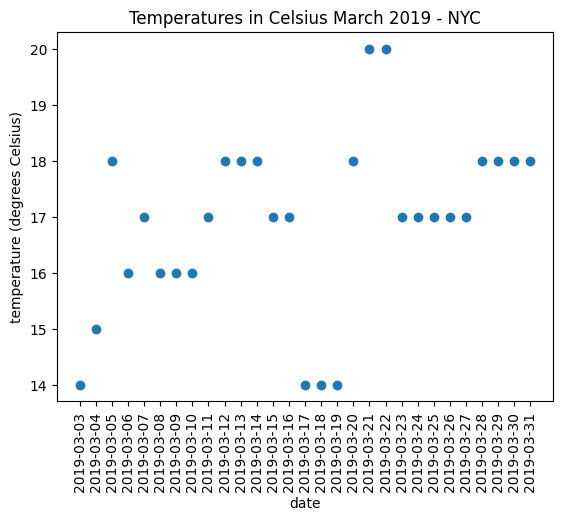

In [89]:
# import matplotlib
import matplotlib.pyplot as plt

# create a scatter plot
plt.scatter(x = 'date', y = 'temperature', data = temps)

# create title, xlabel, and ylabel
plt.title('Temperatures in Celsius March 2019 - NYC')
plt.xlabel('date')
plt.ylabel('temperature (degrees Celsius)')
plt.xticks(rotation = 90)

# show plot
plt.show()

**Convert farhenheit data to celsius**

In [88]:
temp_fah = temps.loc[temps['temperature'] > 40, 'temperature'] # use .loc to subset data above 40

temp_cels = (temp_fah - 32) * (5/9) # convert to celsius

temps.loc[temps['temperature'] > 40, 'temperature'] = temp_cels

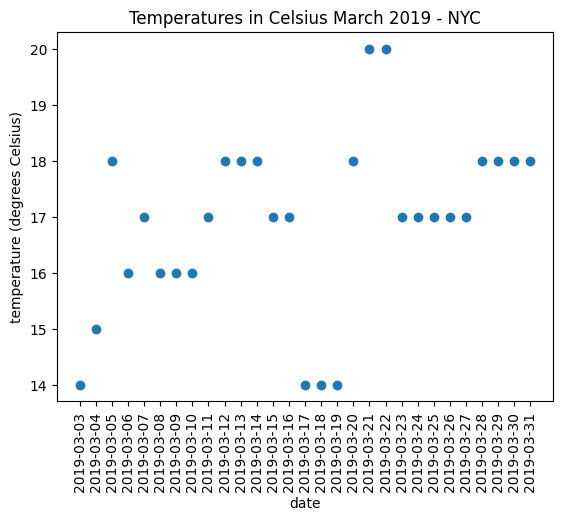

In [90]:
# create a scatter plot
plt.scatter(x = 'date', y = 'temperature', data = temps)

# create title, xlabel, and ylabel
plt.title('Temperatures in Celsius March 2019 - NYC')
plt.xlabel('date')
plt.ylabel('temperature (degrees Celsius)')
plt.xticks(rotation = 90)

# show plot
plt.show()

**Clean-up Dates**

In [78]:
birthdays = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/birthdays.csv')
birthdays.head()

,birth_date,first_name,last_name
0,27/27/2019,Rowan,Nunez
1,3/29/19,Brynn,Yang
2,"March 3rd, 2019",Sophia,Reilly
3,24-03-19,Deacon,Prince
4,6/3/19,Griffith,Neal


The `datetime` package is useful for representing dates

[How to format dates in python](https://stackabuse.com/how-to-format-dates-in-python/)

We also use `pandas.to_datetime`
* can recognize more formats automatically
* sometimes fails with erroneous or unrecongizable formats

In [96]:
# converts to datetime
birthdays['birth_date'] = pd.to_datetime(birthdays['birth_date'])
#date parse error 27/27/2019

<ipython-input-96-35cedb56ed86>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  birthdays['birth_date'] = pd.to_datetime(birthdays['birth_date'])


**Doesn't work!**

try:

In [93]:
birthdays['birth_date'] = pd.to_datetime(birthdays['birth_date'],
                                        # attempt to infer format for each date
                                        infer_datetime_format = True,
                                        # return NA for rows where conversion failed
                                        errors = 'coerce')

In [94]:
birthdays

,birth_date,first_name,last_name
0,NaT,Rowan,Nunez
1,2019-03-29,Brynn,Yang
2,2019-03-03,Sophia,Reilly
3,2019-03-24,Deacon,Prince
4,2019-03-06,Griffith,Neal


In [95]:
birthdays['birth_date'] = birthdays['birth_date'].dt.strftime('%d-%m-%Y')
birthdays

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,birth_date,first_name,last_name
0,NaN,Rowan,Nunez
1,29-03-2019,Brynn,Yang
2,03-03-2019,Sophia,Reilly
3,24-03-2019,Deacon,Prince
4,06-03-2019,Griffith,Neal


**Ambiguous Data**

Is `2019-03-08` in August or March?

* Can convert to `NaN` or treat accordingly
* Can infer - this is where knowing your data is useful